In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np


In [2]:
dataset,info = tfds.load('glue/sst2',with_info=True)

In [3]:
print(info.features)

FeaturesDict({
    'idx': tf.int32,
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'sentence': Text(shape=(), dtype=tf.string),
})


In [4]:
print(info.features['label'].num_classes)

2


In [5]:
print(info.features['label'].names)

['negative', 'positive']


In [6]:
dataset_train, dataset_validation = dataset['train'],dataset['validation']

In [7]:
dataset_train

<PrefetchDataset shapes: {idx: (), label: (), sentence: ()}, types: {idx: tf.int32, label: tf.int64, sentence: tf.string}>

In [8]:
for example in dataset_train.take(2):
    review,label = example['sentence'],example['label']
    print("Review: ",review)
    print('Label: %d \n'% label.numpy())

Review:  tf.Tensor(b'for the uninitiated plays better on video with the sound ', shape=(), dtype=string)
Label: 0 

Review:  tf.Tensor(b'like a giant commercial for universal studios , where much of the action takes place ', shape=(), dtype=string)
Label: 0 



In [9]:
training_reviews = []
training_labels = []
validation_reviews = []
validation_labels = []

for item in dataset_train.take(10000):
    review,label = item["sentence"], item["label"]
    training_reviews.append(str(review.numpy()))
    training_labels.append(label.numpy())

In [10]:
training_reviews

["b'for the uninitiated plays better on video with the sound '",
 "b'like a giant commercial for universal studios , where much of the action takes place '",
 "b'company once again dazzle and delight us '",
 'b"\'s no surprise that as a director washington demands and receives excellent performances , from himself and from newcomer derek luke "',
 "b', this cross-cultural soap opera is painfully formulaic and stilted . '",
 'b", the film is n\'t nearly as downbeat as it sounds , but strikes a tone that \'s alternately melancholic , hopeful and strangely funny . "',
 "b'only masochistic moviegoers need apply . '",
 "b'convince almost everyone that it was put on the screen , just for them '",
 'b"like the english patient and the unbearable lightness of being , the hours is one of those reputedly `` unfilmable \'\' novels that has bucked the odds to emerge as an exquisite motion picture in its own right . "',
 "b'his supple understanding of the role '",
 "b'revelatory nor truly edgy -- me

In [11]:
training_labels

[0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,


In [12]:
print("\n Number of training reviews: ",len(training_reviews))


 Number of training reviews:  10000


In [13]:
for i in range(0,2):
    print(training_reviews[i])
    print(training_labels[i])

b'for the uninitiated plays better on video with the sound '
0
b'like a giant commercial for universal studios , where much of the action takes place '
0


In [14]:
for item in dataset_validation.take(-1):
    review,label = item["sentence"],item["label"]
    validation_reviews.append(str(review.numpy()))
    validation_labels.append(label.numpy())

In [15]:
print("\n Number of validation reviews: ",len(validation_reviews))


 Number of validation reviews:  872


In [16]:
vocab_size = 4000
embedding_dim = 16
max_length = 50
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, "'": 2, 'the': 3, 'and': 4, 'a': 5, 'of': 6, 'b': 7, 'to': 8, "'s": 9, 'in': 10, 'that': 11, 'is': 12, 'it': 13, 'as': 14, "b'a": 15, 'with': 16, 'film': 17, 'movie': 18, 'for': 19, "b'the": 20, 'its': 21, 'an': 22, 'you': 23, 'this': 24, 'but': 25, 'on': 26, 'be': 27, "n't": 28, "b'is": 29, 'by': 30, "b'": 31, 'at': 32, 'not': 33, 'or': 34, 'about': 35, 'more': 36, 'one': 37, 'so': 38, 'than': 39, 'all': 40, 'out': 41, 'from': 42, 'his': 43, 'like': 44, 'have': 45, 'are': 46, 'good': 47, 'story': 48, 'up': 49, 'who': 50, 'most': 51, 'has': 52, 'too': 53, 'into': 54, 'your': 55, 'time': 56, 'characters': 57, 'just': 58, 'comedy': 59, 'their': 60, 'funny': 61, 'life': 62, 'i': 63, 'even': 64, 'well': 65, "b'of": 66, 'little': 67, 'much': 68, 'does': 69, 'if': 70, 'will': 71, 'very': 72, 'what': 73, "b'an": 74, 'can': 75, 'which': 76, 'been': 77, 'no': 78, 'love': 79, "b'that": 80, "''": 81, 'bad': 82, "b'to": 83, 'best': 84, 'work': 85, 'action': 86, 'humor': 87, 'way': 88,

In [18]:
training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = pad_sequences(training_sequences,maxlen=max_length,truncating=trunc_type,padding=pad_type)

validation_sequences = tokenizer.texts_to_sequences(validation_reviews)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

In [19]:
training_labels_final = np.array(training_labels)
validation_labels_final = np.array(validation_labels)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            64000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 64,017
Trainable params: 64,017
Non-trainable params: 0
_________________________________________________________________


In [21]:
num_epochs = 20
history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(validation_padded,validation_labels_final))

Epoch 1/20
313/313 [==============================] - 4s 4ms/step - loss: 0.6836 - accuracy: 0.5555 - val_loss: 0.6889 - val_accuracy: 0.5138
Epoch 2/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6724 - accuracy: 0.5714 - val_loss: 0.6728 - val_accuracy: 0.5998
Epoch 3/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6533 - accuracy: 0.6202 - val_loss: 0.6481 - val_accuracy: 0.6479
Epoch 4/20
313/313 [==============================] - 1s 3ms/step - loss: 0.6250 - accuracy: 0.6697 - val_loss: 0.6173 - val_accuracy: 0.6938
Epoch 5/20
313/313 [==============================] - 1s 3ms/step - loss: 0.5916 - accuracy: 0.7069 - val_loss: 0.5855 - val_accuracy: 0.7122
Epoch 6/20
313/313 [==============================] - 1s 3ms/step - loss: 0.5575 - accuracy: 0.7407 - val_loss: 0.5574 - val_accuracy: 0.7213
Epoch 7/20
313/313 [==============================] - 1s 3ms/step - loss: 0.5249 - accuracy: 0.7678 - val_loss: 0.5336 - val_accuracy: 0.7489
Epoch 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend(['string','val_'+string])
    plt.show()

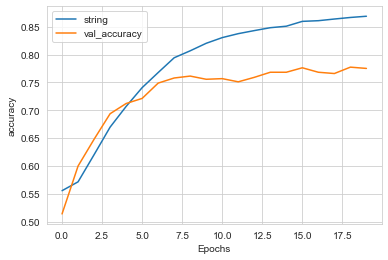

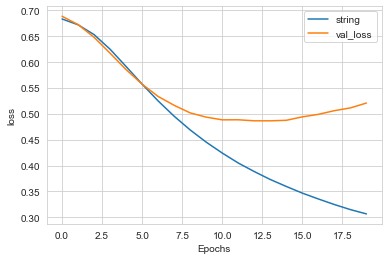

In [26]:
plot_graphs(history,"accuracy")
plot_graphs(history,'loss')

In [27]:
review1  = """I love this movie"""
review2 = """that was the worst movie, i have ever seen"""

In [28]:
new_review = [review1,review2]

In [29]:
def predict_review(model,reviews):
    padding_type = "post"
    sample_sequences = tokenizer.texts_to_sequences(reviews)
    reviews_padded = pad_sequences(sample_sequences,padding=padding_type,maxlen=max_length)
    classes = model.predict(reviews_padded)
    for x in range(len(reviews_padded)):
        print(reviews[x])
        print(classes[x])
        print('\n')

In [30]:
predict_review(model,new_review)

I love this movie
[0.6901533]


that was the worst movie, i have ever seen
[0.0495888]




In [31]:
def fit_model_and_show_results(model,reviews):
    model.summary()
    history = model.fit(training_padded,training_labels_final,epochs=num_epochs,validation_data=(validation_padded,validation_labels_final))
    plot_graphs(history,'accuracy')
    plot_graphs(history,'loss')
    predict_review(model,reviews)

In [32]:
# CNN


In [33]:
num_epochs = 30
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Conv1D(16,5,activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [34]:
learning_rate = 0.0001
model_cnn.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            64000     
_________________________________________________________________
conv1d (Conv1D)              (None, 46, 16)            1296      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 65,313
Trainable params: 65,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 8s 4ms/step - loss: 0.6892 - accuracy: 0.5590 - val_loss: 0.6936 - val_accuracy: 0.5092
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.5590 - val_

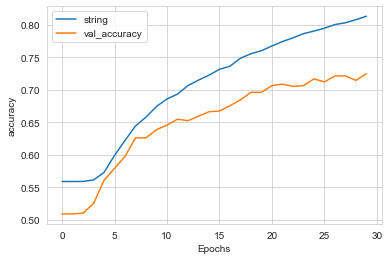

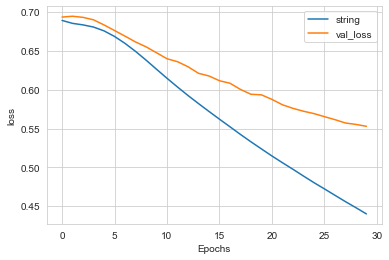

I love this movie
[0.7714017]


that was the worst movie, i have ever seen
[0.19653654]




In [35]:
fit_model_and_show_results(model_cnn,new_review)

In [36]:
# Bidirectional LSTM

In [37]:
num_epochs = 30
model_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [38]:
learning_rate = 0.00003
model_bidi_lstm.compile(loss='binary_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 32)                4224      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 68,257
Trainable params: 68,257
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 6s 11ms/step - loss: 0.6905 - accuracy: 0.5592 - val_loss: 0.6935 - val_accuracy: 0.5092
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6868 - accuracy: 0.5590 - val_loss: 0.6948 - val_accuracy: 0.5092
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 0.6841 - accuracy: 0.

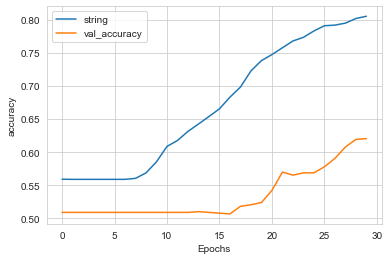

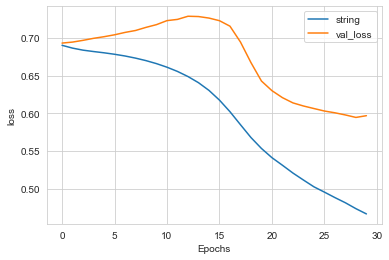

I love this movie
[0.61883754]


that was the worst movie, i have ever seen
[0.2567105]




In [39]:
fit_model_and_show_results(model_bidi_lstm,new_review)

In [40]:
# multiple LSTM


In [41]:
model_multiple_bidi_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [42]:
learning_rate = 0.0003
model_multiple_bidi_lstm.compile(loss='binary_crossentropy',optimizer= tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 16)            64000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 50, 32)            4224      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 32)                6272      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 74,529
Trainable params: 74,529
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
313/313 [==============================] - 8s 18ms/step - loss: 0.6830 - accuracy: 0.5571 - val_loss: 0.7256 - val_accuracy: 0.5092
Epoch 2/30
313/313 [==============================] - 5s 16ms/step - loss: 0.5097 - accuracy: 0.7381 - va

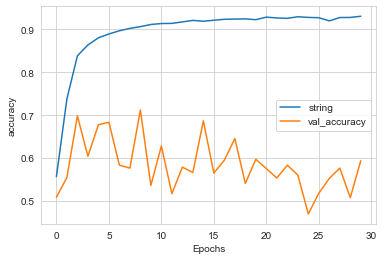

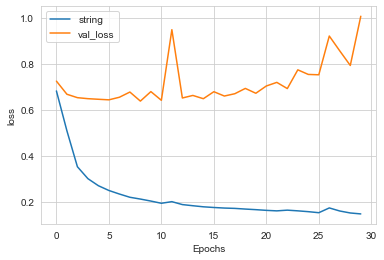

I love this movie
[0.99143475]


that was the worst movie, i have ever seen
[0.5933498]




In [43]:
fit_model_and_show_results(model_multiple_bidi_lstm,new_review)